# RFM Analysis in Python

The dataset under study contains credit card transactions from the State of Oklahoma. It includes information on purchases made through the purchase card programs administered by the state and higher educational institutions. The purchase card information is updated monthly after the end of every month. As such, July information is added in August, August in September, and so on and so forth.

In a brief, here's the data description:
- Dataset contains around 440k credit card transactions.
- Each row in the dataset refers to a credit card transaction by a cardholder.
- Each cardholder belongs to an agency.
- Each transaction has the following information:
    - cardholder name
    - agency
    - amount
    - transaction date
    - merchant name (vendor)
    - merchant category
    - description of the expense

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', None)

# Load and clean the data

In [8]:
df = pd.read_csv(r"C:\Users\User\Documents\DATA ANALYST\SELF STUDY\MODULE 5\HA\HA 5.8\res_purchase_card_(pcard)_fiscal_year_2014_3pcd-aiuu (1).csv",
                   parse_dates=['Transaction Date', 'Posted Date'])
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_15928\4155892172.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r"C:\Users\User\Documents\DATA ANALYST\SELF STUDY\MODULE 5\HA\HA 5.8\res_purchase_card_(pcard)_fiscal_year_2014_3pcd-aiuu (1).csv",
C:\Users\User\AppData\Local\Temp\ipykernel_15928\4155892172.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r"C:\Users\User\Documents\DATA ANALYST\SELF STUDY\MODULE 5\HA\HA 5.8\res_purchase_card_(pcard)_fiscal_year_2014_3pcd-aiuu (1).csv",


,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [9]:
# full name column
df['full_name'] = df['Cardholder Last Name'] + ', ' + df['Cardholder First Initial']

df.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),full_name
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,"Mason, C"
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,"Mason, C"
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,"Massey, J"
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS","Massey, T"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...","Mauro-Herrera, M"


In [10]:
# remove agency (Do not include transactions made by agencies (customer name = agency))
df = df[df['Agency Number'].astype(str)!=df['Cardholder Last Name']]
df.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),full_name
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,"Mason, C"
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,"Mason, C"
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,"Massey, J"
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS","Massey, T"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...","Mauro-Herrera, M"


In [11]:
# remove negative amounts
df = df[df['Amount']>0]
df.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),full_name
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,"Mason, C"
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,"Mason, C"
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,"Massey, J"
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS","Massey, T"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...","Mauro-Herrera, M"


# RFM Analysis

In [12]:
import datetime

current_date = datetime.datetime(2014, 7, 1)
current_date

datetime.datetime(2014, 7, 1, 0, 0)

### Recency

In [13]:
# get max transaction date per customer
df_latest_invoice = df.groupby('full_name')['Transaction Date'].max()

In [14]:
# get number of days between latest invoice date and current date
# .dt.days means that we only get the actual days (not decimal)
df_recency = (current_date - df_latest_invoice).dt.days

### Frequency

In [15]:
# get frequency (count)
df_frequency = df.groupby('full_name')['full_name'].count()

### Monetary

In [16]:
# get the total amount (sum of all amounts)
df_monetary = df.groupby('full_name')['Amount'].sum()

## RFM Scores

We now merge these tables into a single dataframe. We put each series together in a dictionary and use `pd.DataFrame`

In [17]:
df_rfm = pd.DataFrame({'recency':df_recency, 'frequency':df_frequency, 'monetary':df_monetary})

df_rfm

,recency,frequency,monetary
full_name,,,
"AARON, B",43,3,1390.00
"ACREE, T",7,85,27991.45
"ADAMS, C",78,23,1054.71
"ADAMS, K",13,68,8067.13
"ADAMS, S",32,31,2937.56
"ADE, D",5,56,12419.25
"ADKINS, M",18,1,11.86
"ADMIRE, A",7,96,11259.00
"ADUDDELL, D",18,12,8280.00


#### Calculate RFM scores. Use quantiles (0.25, 0.50, 0.75) to map the scores from 1 to 4

In [18]:
quantiles = df_rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary
0.25,5.0,12.0,2229.170
0.50,14.0,34.0,7874.830
0.75,54.0,89.0,24446.665


Using the quantiles function, we can get our thresholds for segmentation.

1. For recency score (lower is better):
- Score = 1; quantile between 0-0.25
- Score = 2; quantile between 0.25-0.5
- Score = 3; quantile between 0.5-0.75
- Score = 4; quantile between 0.75 - 1

<br>  
2. For frequency and monetary score (higher is better):
- Score = 1; quantile between 0.75 - 1
- Score = 2; quantile between 0.5-0.75
- Score = 3; quantile between 0.25-0.5
- Score = 4; quantile between 0-0.25

<br>  

#### Recency Score

In [19]:
# create a dictionary with the recency quantiles
recency_dict = quantiles['recency'].to_dict()
recency_dict

{0.25: 5.0, 0.5: 14.0, 0.75: 54.0}

In [20]:
# create a function to calculate recency score
def recency_score(recency, recency_dict):
    if recency <= recency_dict[0.25]:
        # recency_score = 1 if recency is between 0-0.25 quantile
        return '1'
    elif recency <= recency_dict[0.50]:
        # recency_score = 2 if recency is between 0.25-0.5 quantile
        return '2'
    elif recency <= recency_dict[0.75]:
        # recency_score = 3 if recency is between 0.5-0.75 quantile
        return '3'
    else:
        # recency_score = 4 if recency is between 0.75-1 quantile
        return '4'

df_rfm['recency_score'] = df_rfm['recency'].apply(recency_score, args=(recency_dict,))
df_rfm.head()

,recency,frequency,monetary,recency_score
full_name,,,,
"AARON, B",43,3,1390.00,3
"ACREE, T",7,85,27991.45,2
"ADAMS, C",78,23,1054.71,4
"ADAMS, K",13,68,8067.13,2
"ADAMS, S",32,31,2937.56,3


### Frequency Score

In [21]:
# create a dictionary with the frequency quantiles
frequency_dict = quantiles['frequency'].to_dict()
frequency_dict

{0.25: 12.0, 0.5: 34.0, 0.75: 89.0}

In [22]:
# create a function to calculate frequency score
def frequency_score(frequency, frequency_dict):
    if frequency <= frequency_dict[0.25]:
        # frequency_score = 4 if frequency is between 0-0.25 quantile
        return '4'
    elif frequency <= frequency_dict[0.50]:
        # frequency_score = 3 if frequency is between 0.25-0.5 quantile
        return '3'
    elif frequency <= frequency_dict[0.75]:
        # frequency_score = 2 if frequency is between 0.5-0.75 quantile
        return '2'
    else:
        # frequency_score = 1 if frequency is between 0.75-1 quantile
        return '1'

df_rfm['frequency_score'] = df_rfm['frequency'].apply(frequency_score, args=(frequency_dict,))
df_rfm.head()

,recency,frequency,monetary,recency_score,frequency_score
full_name,,,,,
"AARON, B",43,3,1390.00,3,4
"ACREE, T",7,85,27991.45,2,2
"ADAMS, C",78,23,1054.71,4,3
"ADAMS, K",13,68,8067.13,2,2
"ADAMS, S",32,31,2937.56,3,3


### Monetary Score

In [23]:
# create a dictionary with the monetary quantiles
monetary_dict = quantiles['monetary'].to_dict()
monetary_dict

{0.25: 2229.17, 0.5: 7874.830000000001, 0.75: 24446.665}

In [24]:
# create a function to calculate monetary score
def monetary_score(monetary, monetary_dict):
    if monetary <= monetary_dict[0.25]:
        # monetary_score = 4 if monetary is between 0-0.25 quantile
        return '4'
    elif monetary <= monetary_dict[0.50]:
        # monetary_score = 3 if monetary is between 0.25-0.5 quantile
        return '3'
    elif monetary <= monetary_dict[0.75]:
        # monetary_score = 2 if monetary is between 0.5-0.75 quantile
        return '2'
    else:
        # monetary_score = 1 if monetary is between 0.75-1 quantile
        return '1'

df_rfm['monetary_score'] = df_rfm['monetary'].apply(monetary_score, args=(monetary_dict,))
df_rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
full_name,,,,,,
"AARON, B",43,3,1390.00,3,4,4
"ACREE, T",7,85,27991.45,2,2,1
"ADAMS, C",78,23,1054.71,4,3,4
"ADAMS, K",13,68,8067.13,2,2,2
"ADAMS, S",32,31,2937.56,3,3,3


#### Concatenating the RFM Scores

In [25]:
# Concatenate the three created columns earlier
df_rfm['rfm_score'] = df_rfm['recency_score'] + df_rfm['frequency_score'] + df_rfm['monetary_score']
df_rfm.head(10)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
full_name,,,,,,,
"AARON, B",43,3,1390.00,3,4,4,344
"ACREE, T",7,85,27991.45,2,2,1,221
"ADAMS, C",78,23,1054.71,4,3,4,434
"ADAMS, K",13,68,8067.13,2,2,2,222
"ADAMS, S",32,31,2937.56,3,3,3,333
"ADE, D",5,56,12419.25,1,2,2,122
"ADKINS, M",18,1,11.86,3,4,4,344
"ADMIRE, A",7,96,11259.00,2,1,2,212
"ADUDDELL, D",18,12,8280.00,3,4,2,342


#### Insights, recommendations, analysis.

In [27]:
segment_counts = {'Best_Customers(111)' : len(df_rfm[df_rfm['rfm_score']=='111']),
                  'Loyal_Customers(X1X)' : len(df_rfm[df_rfm['frequency_score']=='1']),
                  'Big_Spenders(XX1)' : len(df_rfm[df_rfm['monetary_score']=='1']),
                  'Almost_Lost(311)' : len(df_rfm[df_rfm['rfm_score']=='311']),
                  'Lost_Good_Customers(411)' : len(df_rfm[df_rfm['rfm_score']=='411']),
                  'Lost_Cheap_Customers(444)' : len(df_rfm[df_rfm['rfm_score']=='444']),

                  }

In [28]:
df_counts = pd.DataFrame(segment_counts.values(), index=segment_counts.keys(), columns=['counts'])
df_counts

,counts
Best_Customers(111),575
Loyal_Customers(X1X),1282
Big_Spenders(XX1),1298
Almost_Lost(311),86
Lost_Good_Customers(411),44
Lost_Cheap_Customers(444),621


Text(0, 0.5, '# Customers')

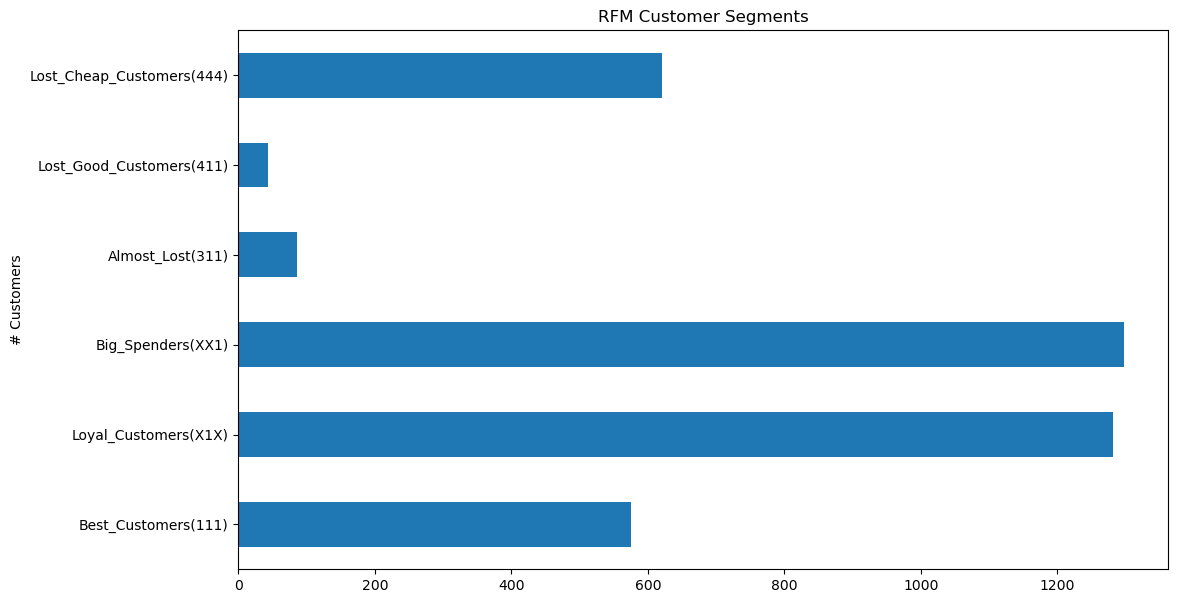

In [29]:
#Customer Segment Count

fig, ax = plt.subplots (figsize = (12,7))
df_counts.plot(kind = 'barh', ax=ax, legend=False)
ax.set_title('RFM Customer Segments')
ax.set_ylabel('# Customers')

In [30]:
customer_count = df['full_name'].nunique()


df_counts['pct'] = df_counts['counts'] / customer_count

Text(0, 0.5, '# Customers')

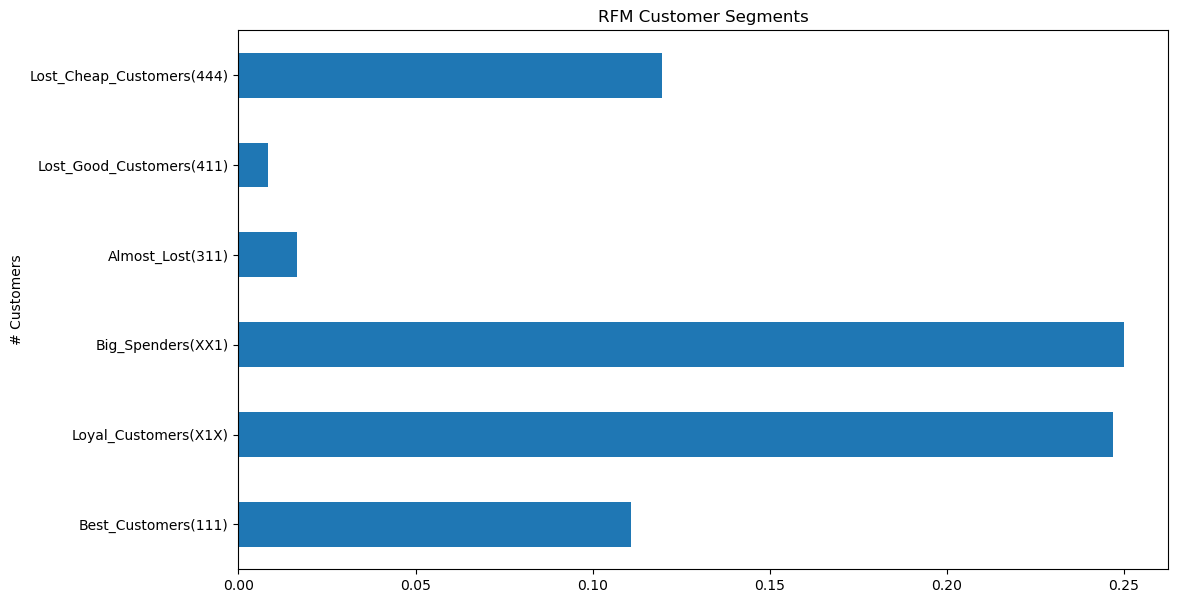

In [31]:
#Customer Segments in percentages
fig, ax = plt.subplots (figsize = (12,7))
df_counts['pct'].plot(kind = 'barh', ax=ax, legend=False)
ax.set_title('RFM Customer Segments')
ax.set_ylabel('# Customers')

In [32]:
#Top Customers

df_rfm[df_rfm['rfm_score']=='111'].sort_values('monetary',ascending=False).head(10)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
full_name,,,,,,,
"Cardholder, e",3,1622,17865671.21,1,1,1,111
"Saltzman, D",3,852,3281746.34,1,1,1,111
"JOURNEY HOUSE TRAVEL INC, G",4,9650,3175926.70,1,1,1,111
"UNIVERSITY AMERICAN, G",4,6997,2579440.48,1,1,1,111
"LARSON, B",4,695,2192200.36,1,1,1,111
"CANTRELL, P",2,336,1769319.49,1,1,1,111
"Hines, G",3,3213,1702434.87,1,1,1,111
"Johnson, C",5,115,1477962.96,1,1,1,111
"Stroup, P",3,1860,1351728.28,1,1,1,111


Text(0, 0.5, 'Cardholder Name')

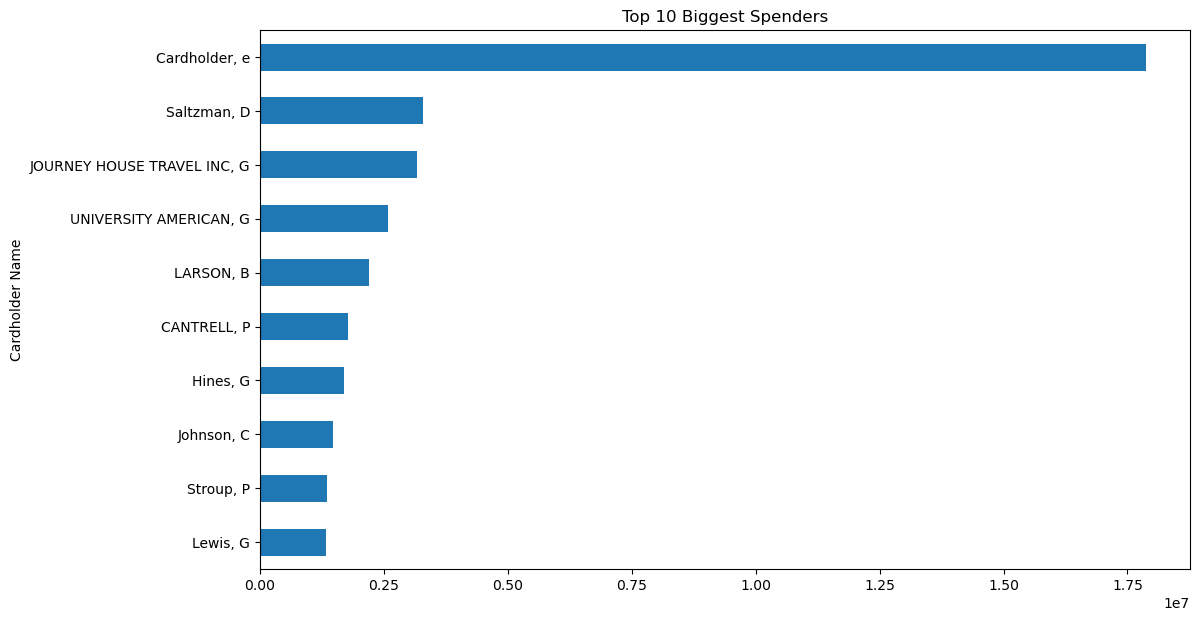

In [33]:
#Top 10 Biggest Spenders

fig, ax = plt.subplots (figsize = (12,7))
df_monetary.sort_values(ascending=True).tail(10).plot(kind = 'barh', ax=ax)
ax.set_title('Top 10 Biggest Spenders')
ax.set_ylabel('Cardholder Name')

In [34]:
 df_top_merchants = df.groupby('Merchant Category Code (MCC)')['Amount'].sum()

df_top_merchants.sort_values(ascending=False).head(10)

Merchant Category Code (MCC)
DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP AND SUP.      11180670.48
INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED                 11089700.06
COMPUTERS, COMPUTER PERIPHERAL EQUIPMENT, SOFTWARE           10152357.86
COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED                8209761.28
AMERICAN AIRLINES                                             5766317.41
MISCELLANEOUS AND SPECIALTY RETAIL STORES                     5642660.73
BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED                    5282567.52
STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER       5192115.11
DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED     4788960.30
ELECTRICAL PARTS AND EQUIPMENT                                3997448.15
Name: Amount, dtype: float64

Text(0, 0.5, 'Merchant Category')

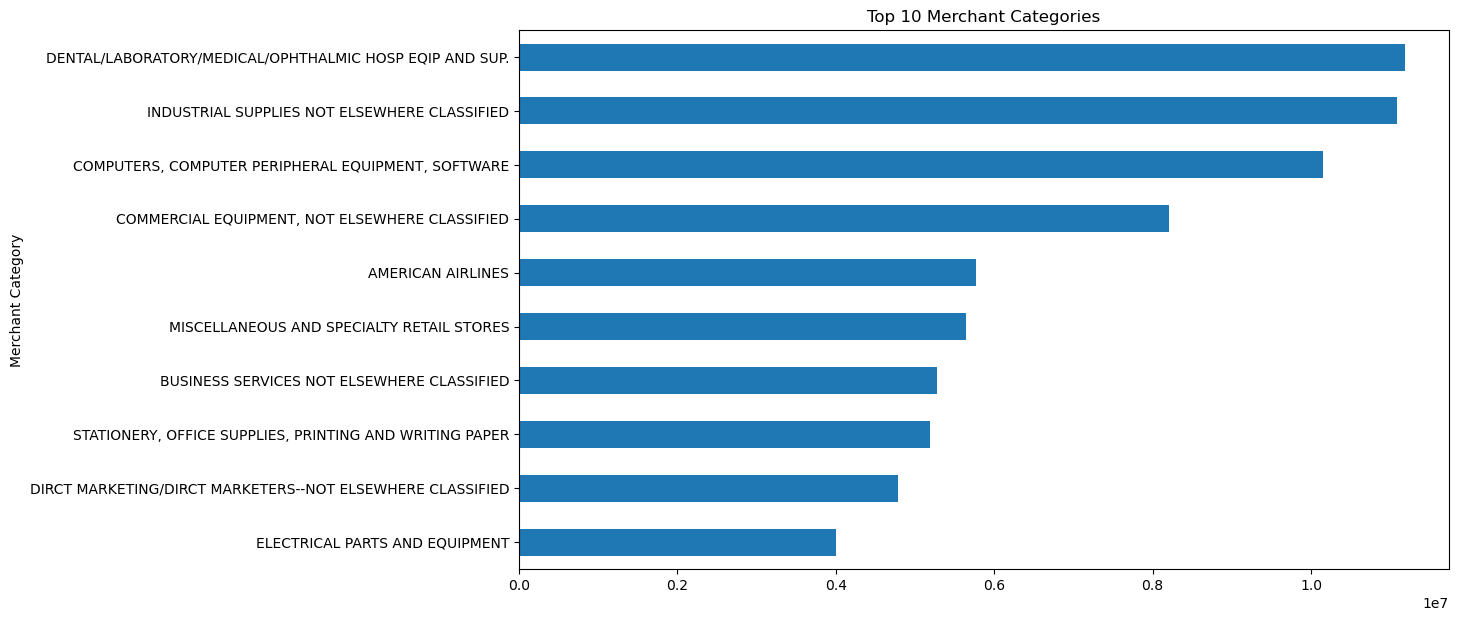

In [35]:
#Top 10 Merchant Categories

fig, ax = plt.subplots (figsize = (12,7))
df_top_merchants.sort_values(ascending=True).tail(10).plot(kind = 'barh', ax=ax)
ax.set_title('Top 10 Merchant Categories')
ax.set_ylabel('Merchant Category')

**Analysis and Reccomendations**

Using RFM, we were able to create segments of our customers. This helped us identify the following:


*   Customers that generate the biggest revenue and are the most valuable to the card program.
 Customers belonging to this segment should be shown their importance by assigning certain perks such "gold" card, VIP status or loyalty rewards.
* Customers that the program is on the edge of losing
*  Which customers can be retained and increased interest in using the service by sending out promotional offers and bonuses
*  How to transfer customers from a "sleeping" group to "active buyers" by offering special discounts or gifts for extra

The top 10 merchant categories of the customers have also been determined through analysis. These can provide us additional information on where bonuses, discounts or loyatly rewards can be placed, since these categories are what customers are spending most of their money on